# SVM Ball Tracking Test

## Imports

In [77]:
"""
Author: Ankush Gola
"""

import numpy as np
import scipy as sp
from sklearn import preprocessing
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import cv2

# Configure matplotlib to show figures embedded in the notebook
%matplotlib inline

## Training

In [4]:
def flatten(img):
    """
    Flatten a color image into a vector of pixels
    """
    M, N, P = img.shape
    return img.reshape(M*N, P)

    #['train_1_sunny', 'train_2_sunny', 'train_3_sunny', 'train_4_sunny', 'train_1_cloudy', 'train_2_cloudy', 
    #'train_3_cloudy', 'train_5_cloudy', 'train_6_cloudy', 'train_7_cloudy', 'train_8_cloudy',

In [7]:
imgs = ['ball_1', 'ball_2', 'ball_3', 'ball_5']

d = {}

# Flatten images into a single vector
for img in imgs:
    train = (mpimg.imread(img+'.jpg').astype(float))/255
    train = flatten(train)
    d[img] = train
    
X = np.vstack(tuple([d[k] for k in d]))

# Preprocess data
#X = preprocessing.scale(X)

# Train Single Class SVM
nu = 1
gamma = 1
clf = svm.OneClassSVM(nu=1, kernel="rbf", gamma=1).fit(X)

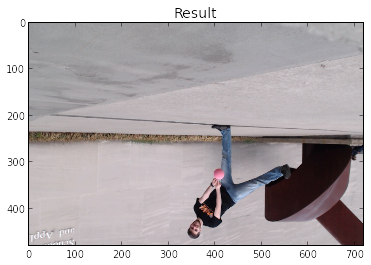

In [8]:
# classify pixels in test_img
test_1 = (mpimg.imread('cloudy_test_1_img.jpg').astype(float))/255

M, N, P = test_1.shape
#test_1_f = preprocessing.scale(flatten(test_1), axis=1)
test_1_f = flatten(test_1)
Z = clf.predict(test_1_f)
Z = Z.reshape(M, N)

# mask the image
grey = [0.7, 0.7, 0.8]
out = np.copy(test_1)
out[np.where(Z==1)] = grey

plt.figure(1)
plt.title("Result", fontsize=14)
plt.imshow(out)
plt.show()

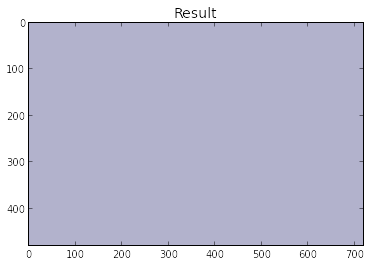

In [37]:
grey = [0.7, 0.7, 0.8]
out = np.copy(test_1)
out[np.where(Z==-1)] = grey

plt.figure(1)
plt.title("Result", fontsize=14)
plt.imshow(out)
plt.show()

In [31]:
print X.shape

(24394, 3)


## Trying with a 2 class Classifier

In [251]:
ball_imgs = ['ball_2', 'ball_3', 'ball_4', 'ball_5', 'ball_6']
back_imgs = ['sky_1', 'sky_2', 'granite', 'joseph', 'skin', 'skin_2', 'stone', 'sculpt', 'jacket', 'brick']

ball, back = {}, {}

# Flatten images into a single vector
for img in ball_imgs:
    ball_img = (mpimg.imread('train/'+img+'.jpg').astype(float))/255
    train = flatten(ball_img)
    ball[img] = train

for img in back_imgs:
    back_img = (mpimg.imread('train/'+img+'.jpg').astype(float))/255
    train = flatten(back_img)
    back[img] = train

X_ball, X_back = np.vstack(tuple([ball[k] for k in ball])), np.vstack(tuple([back[k] for k in back]))
y_ball, y_back = np.ones(X_ball.shape[0]).astype(np.uint8), np.zeros(X_back.shape[0]).astype(np.uint8)

X = np.vstack((X_ball, X_back))
y = np.hstack((y_ball, y_back))

# Train the SVM
C = 10
gamma = 1
clf2 = svm.SVC(C=C, kernel='rbf', gamma=gamma, cache_size=1500).fit(X, y)

In [186]:
for k in ball:
    mpimg.imsave(k, ball[k])

for k in back:
    mpimg.imsave(k, back[k])

## Trying with a 3 class Classifier

In [37]:
ball_imgs = ['ball_1', 'ball_2', 'ball_3', 'ball_4', 'ball_5']
sky_imgs = ['sky_1', 'sky_2', 'sky_3'] 
other_imgs = ['joseph', 'stone', 'granite', 'skin']

ball, sky, other = {}, {}, {}

# Flatten images into a single vector
for img in ball_imgs:
    ball_img = (mpimg.imread('train/'+img+'.jpg').astype(float))/255
    train = flatten(ball_img)
    ball[img] = train

for img in sky_imgs:
    sky_img = (mpimg.imread('train/'+img+'.jpg').astype(float))/255
    train = flatten(sky_img)
    sky[img] = train

for img in other_imgs:
    other_img = (mpimg.imread('train/'+img+'.jpg').astype(float))/255
    train = flatten(other_img)
    other[img] = train


X_ball, X_sky, X_other = np.vstack(tuple([ball[k] for k in ball])), np.vstack(tuple([sky[k] for k in sky])), np.vstack(tuple([other[k] for k in other]))

o = np.empty(X_other.shape[0])
o.fill(2)

print o.shape
y_ball, y_sky, y_other = np.zeros(X_ball.shape[0]), np.ones(X_sky.shape[0]), o

X = np.vstack((X_ball, X_sky, X_other))
y = np.hstack((y_ball, y_sky, y_other))
#X = preprocessing.scale(X)

print X.shape

# Train the SVM
C = 2
gamma = 1
clf3 = svm.SVC(C=C, kernel='linear', gamma=gamma).fit(X, y)

(3209,)
(7199, 3)


## Classify

1.60361099243
(169.5, 204.5, 36.667423)


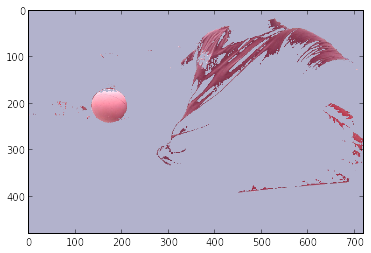

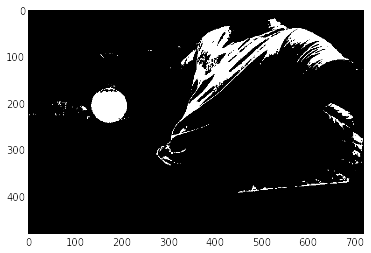

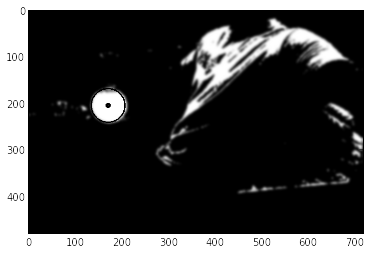

In [291]:
from sklearn.externals import joblib

clf2 = joblib.load('model/clf.pkl') 

#test_1 = ((mpimg.imread('test/sunny_test_4.jpg')).astype(float))/255
#test_1 = cv2.resize(test_1,None,fx=1, fy=1)

test_1 = cv2.imread('test/indoor_test_1.jpg')
test_1 = cv2.cvtColor(test_1, cv2.COLOR_BGR2RGB)
test_1 = test_1.astype(float)/255

M, N, P = test_1.shape
#test_1_f = preprocessing.scale(flatten(test_1), axis=1)
test_1_f = flatten(test_1)

# classify pixels in test_1
t = time.time()
Z = clf2.predict(test_1_f)
Z = Z.reshape(M, N)
print time.time()-t

# mask the image
grey = [0.7, 0.7, 0.8]
out = np.copy(test_1)
out[np.where(Z==0)] = grey

plt.figure()
plt.imshow(out)

plt.figure()
plt.imshow(Z)
Z = cv2.GaussianBlur(Z.astype(np.float),(15,15),0)
Z = (Z*255).astype(np.uint8)
plt.figure()
plt.imshow(Z)



circles = cv2.HoughCircles(Z,cv2.cv.CV_HOUGH_GRADIENT,1,1600, param1 = 50, param2 = 10)
if circles != None:
    (x, y, r) = circles[0,:][0]
    print (x, y, r)
    cv2.circle(Z, (x, y), r, (0,255,0), 2)
    cv2.circle(Z,(x, y), 3 ,(0,0,255),3)